# Exercise 1: Regression Lineaire

## Introduction

Dans cet exercice, vous allez implémenter la régression linéaire et multiple et voir comment cela fonctionne sur les données. Avant de commencer cet exercice de programmation, nous vous recommandons fortement de regarder les cours, de lire ls articles.

Toutes les informations dont vous avez besoin pour résoudre cette tâche se trouvent dans ce notebook et tout le code que vous implémenterez se trouvera dans ce notebook. 

Avant de commencer les exercices, nous devons importer toutes les bibliothèques requises pour cet exercice de programmation. Tout au long du cours, nous utiliserons [`numpy`] (http://www.numpy.org/) pour tous les tableaux et opérations matricielles, et [` matplotlib`] (https://matplotlib.org/) pour les représentations graphiques.



In [61]:
!pip3 install autopep8

Defaulting to user installation because normal site-packages is not writeable


In [62]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces


# library written for this exercise providing additional functions for assignment submission, and others
import utils 


# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Submission and Grading

Après avoir terminé chaque partie de la tâche, assurez-vous de mettre la solution dans votre page Github. Elle doit être accompagné d'un rapport en pdf ou html qui presente tous vos resultats et vous le paratger avec moi(mbousso@univ-thies.sn) et Tony(tony.tonalandu@univ-thies.sn).

Pour cet exercice de programmation, il vous faudra  terminer la première partie de l'exercice pour implémenter la régression linéaire avec une variable et la deuxième partie de l'exercice qui couvre la régression linéaire avec plusieurs variables. Voici une ventilation de la façon dont chaque partie de cet exercice est notée.

**Regression lineaire simple**

| Section | Partie                                           |Fonction correspondante                     | Points 
|---------|:-                                             |:-                                     | :-:    
| 1       | [exercice introductif](#section1)                  | [`warmUpExercise`](#warmUpExercise)    |  5    
| 2       | [Calcul de coût pour une variable](#section2)     | [`computeCost`](#computeCost)         |  20    
| 3       | [Gradient descent pour une variable](#section3) | [`gradientDescent`](#gradientDescent) |  25    
|         | Total Points                                   |                                       | 50    

**Regression linéaire multiple**

| Section | Part                                                 | Submitted Function | Points |
|:-------:|:-                                                    |:-:                  | :-:    |
| 4       | [Normalization des variables](#section4)                   | [`featureNormalize`](#featureNormalize) | 10      |
| 5       | [Calcul de coût pour plusieurs variables](#section5)     | [`computeCostMulti`](#computeCostMulti) | 15      |
| 6       | [Gradient descent pour plusieurs variables](#section5) | [`gradientDescentMulti`](#gradientDescentMulti) |15      |
| 7       | [Equation Normale](#section7)                        | [`normalEqn`](#normalEqn)        | 10      |




## Attention

Voici quelques éléments à garder à l'esprit tout au long de cet exercice:

- Les indices de tableau Python commencent à zéro. 

- Il existe une distinction importante entre les tableaux python (appelés `list` ou` tuple`) et les tableaux `numpy`. Vous devez utiliser des tableaux `numpy` dans tous vos calculs. Les opérations vectorielles / matricielles fonctionnent uniquement avec les tableaux «numpy». Les listes Python ne prennent pas en charge les opérations vectorielles (vous devez utiliser pour les boucles).

- Si vous voyez de nombreuses erreurs lors de l'exécution, inspectez vos opérations matricielles pour vous assurer que vous ajoutez et multipliez des matrices de dimensions compatibles. L'impression des dimensions des tableaux `numpy` en utilisant la propriété` shape` vous aidera à déboguer.

- Par défaut, `numpy` interprète les opérateurs mathématiques comme des opérateurs par élément. Si vous voulez faire une multiplication matricielle, vous devez utiliser la fonction `dot` dans` numpy`. Par exemple, si «A» et «B» sont deux matrices «numpy», alors l'opération de matrice AB est «np.dot (A, B)». Notez que pour les matrices ou vecteurs bidimensionnels (unidimensionnels), cela équivaut également à «A @ B» (nécessite python> = 3,5).

<a id="section1"></a>
## 1 Simple python and `numpy` function

La première partie de ce devoir vous donne de la pratique avec la syntaxe python et numpy. Dans la cellule suivante, vous trouverez le contour d'une fonction python. Modifiez-le pour renvoyer une matrice d'identité 5 x 5 en remplissant le code suivant:
```python
A = np.eye(5)
```
<a id="warmUpExercise"></a>

In [63]:
def warmUpExercise(n):
    """
    Example function in Python which computes the identity matrix.
    
    Returns
    -------
    A : array_like
        The 5x5 identity matrix.
    
    Instructions
    ------------
    Return the 5x5 identity matrix.
    """    
    # ======== YOUR CODE HERE ======
    A = np.eye(n)
    
    # ==============================
    return A

The previous cell only defines the function `warmUpExercise`. We can now run it by executing the following cell to see its output. You should see output similar to the following:

```python
array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])
```

In [64]:
warmUpExercise(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2 Regression lineaire à une seule variable

Vous allez maintenant mettre en œuvre une régression linéaire avec une variable pour prédire les bénéfices d'une chaine d'alimentation. Supposons que vous soyez le PDG d'une franchise de restaurants et envisagez différentes villes pour ouvrir un nouveau point de vente. La chaîne possède déjà des camions dans diverses villes et vous disposez de données sur les bénéfices et les populations des villes. Vous souhaitez utiliser ces données pour vous aider à sélectionner la ville à développer ensuite.

Le fichier Data / ex1data1.txt contient l'ensemble de données pour notre problème de régression linéaire. La première colonne est la population d'une ville (en 10 000) et la deuxième colonne est le profit d'un camion de nourriture dans cette ville (en 10 000 $). Une valeur négative pour le profit indique une perte.

Nous vous fournissons le code nécessaire pour charger ces données. L'ensemble de données est chargé à partir du fichier de données dans les variables x et y:

In [65]:
# Read comma separated data
data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'),delimiter=',')

X = data[:,0]
y = data[:,1]

m = X.size  # number of training examples
# print out some data points
print('{:>8s}{:>10s}'.format('Pop(X)', 'profit(y)'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:10.0f}'.format(X[i], y[i]))

  Pop(X) profit(y)
--------------------------
       6        18
       6         9
       9        14
       7        12
       6         7
       8        12
       7         4
       9        12
       6         7
       5         4


### 2.1 Plotting the Data

Avant de commencer une tâche, il est souvent utile de comprendre les données en les visualisant. Pour cet ensemble de données, vous pouvez utiliser un nuage de points pour visualiser les données, car il n'a que deux propriétés à tracer (profit et population). De nombreux autres problèmes que vous rencontrerez dans la vie réelle sont multidimensionnels et ne peuvent pas être tracés sur un tracé 2D. Il existe de nombreuses bibliothèques de traçage en python (voir ce billet de blog pour un bon résumé des plus populaires).

Dans ce cours, nous utiliserons exclusivement matplotlib pour effectuer tous nos tracés. matplotlib est l'une des bibliothèques de traçage scientifique les plus populaires en python et dispose de nombreux outils et fonctions pour créer de beaux tracés. pyplot est un module de matplotlib qui fournit une interface simplifiée aux tâches de traçage les plus courantes de matplotlib, imitant l'interface de traçage de MATLAB.

<div class="alert alert-block alert-warning">
Vous avez peut-être remarqué que nous avons importé le module `pyplot` au début de cet exercice en utilisant la commande` from matplotlib import pyplot`. C'est assez rare, et si vous regardez du code python ailleurs ou dans les tutoriels `matplotlib`, vous verrez que le module est nommé` plt`. Ceci est utilisé par le renommage de module en utilisant la commande d'importation `import matplotlib.pyplot as plt`. Nous n'utiliserons pas le nom court du module `pyplot` dans ces exercices de classe, mais vous devez être conscient de cet écart par rapport à la norme.

</div>


Dans la partie suivante, votre premier travail consiste à compléter la fonction `plotData` ci-dessous. Modifiez la fonction et remplissez le code suivant:

```python
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
```

In [66]:
def plotData(x, y,xlabel,ylabel):
    """
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    
    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.    
    
    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """
    fig = plt.figure()  # open a new figure
    
    # ====================== YOUR CODE HERE ======================= 
    plt.plot(x,y,'ro',ms=10, mec='k')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # =============================================================
    

Exécutez maintenant la fonction définie avec les données chargées pour visualiser les données. Le résultat final devrait ressembler à la figure suivante:

![](Figures/dataset1.png)

Exécutez la cellule suivante pour visualiser les données.

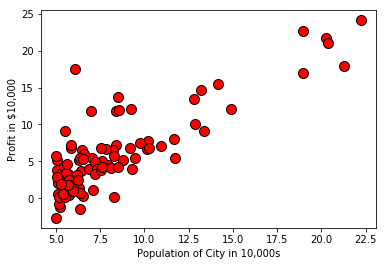

In [67]:
plotData(X, y,'Population of City in 10,000s','Profit in $10,000')

Pour en savoir plus rapidement sur la fonction de tracé `matplotlib` et quels arguments vous pouvez lui fournir, vous pouvez taper`? Pyplot.plot` dans une cellule du carnet jupyter. Cela ouvre une page séparée affichant la documentation de la fonction demandée. Vous pouvez également rechercher en ligne la documentation de traçage.

Pour définir les marqueurs sur des cercles rouges, nous avons utilisé l'option `` ou '' dans la fonction `plot`.

In [10]:
?plt.plot

<a id="section2"></a>
### 2.2 Gradient Descent

Dans cette partie, vous adapterez les paramètres de régression linéaire $ \theta $ à notre ensemble de données en utilisant la descente en gradient.

#### 2.2.1 Update Equations

L'objectif de la régression linéaire est de minimiser la fonction de coût

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

où la fonction d'hypothèse $h_\theta(x)$ est donné par le modèle linéaire
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Rappelez-vous que les paramètres de votre modèle sont les valeurs $ \ theta_j $. Ceux-ci sont
les valeurs que vous ajusterez pour minimiser le coût $ J (\ theta) $. Une façon de le faire est de
utiliser l'algorithme de descente de gradient par lots. En descente de gradient par lots, chacun
l'itération effectue la mise à jour

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

A chaque étape de descente de gradient, vos paramètres $ \theta_j $ se rapprochent des valeurs optimales qui permettront d'atteindre le coût le plus bas J ($ \theta $).

<div class="alert alert-block alert-warning">
** Note d'implémentation: ** Nous stockons chaque exemple sous forme de ligne dans la matrice $ X $ en Python `numpy`. Pour prendre en compte le terme d'interception ($ \theta_0 $), nous ajoutons une première colonne supplémentaire à $ X $ et la définissons sur toutes les autres. Cela nous permet de traiter $ \theta_0 $ comme simplement une autre «fonctionnalité».
</div>


#### 2.2.2 Implementation

Nous avons déjà configuré les données pour la régression linéaire. Dans la cellule suivante, nous ajoutons une autre dimension à nos données pour tenir compte du terme d'interception $ \theta_0 $. N'exécutez PAS cette cellule plusieurs fois.

In [68]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)

<a id="section2"></a>
#### 2.2.3 Calcul de la fonction coût $J(\theta)$

Lorsque vous effectuez une descente de gradient pour apprendre à minimiser la fonction de coût $ J(\theta) $, il est utile de surveiller la convergence en calculant le coût. Dans cette section, vous allez implémenter une fonction pour calculer $ J(\theta) $ afin que vous puissiez vérifier la convergence de votre implémentation de descente de gradient.

Votre prochaine tâche consiste à compléter le code de la fonction `computeCost` qui calcule $ J(\theta) $. En faisant cela, n'oubliez pas que les variables $ X $ et $ y $ ne sont pas des valeurs scalaires. $ X $ est une matrice dont les lignes représentent les exemples de l'ensemble d'apprentissage et $ y $ est un vecteur dont chaque élément représente la valeur à une ligne donnée de $ X $.
<a id="computeCost"></a>

In [69]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    h=np.dot(X,theta)
    # You need to return the following variables correctly
    J = 0.
    # =============================Your Code==============================
    ecart=h-y
    J=np.sum(ecart**2)/(2*m)
    # ===========================================================
    return J

Une fois que vous avez terminé la fonction, l'étape suivante exécutera computeCost deux fois en utilisant deux initialisations différentes de 𝜃. Vous verrez le coût imprimé à l'écran.

In [70]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


*You should now submit your solutions by executing the following cell.*

<a id="section3"></a>
#### 2.2.4 Gradient descent

Ensuite, vous allez compléter une fonction qui implémente la descente de gradient.
La structure de la boucle a été écrite pour vous et vous n'avez qu'à fournir les mises à jour de $ \theta $ à chaque itération.

Lorsque vous programmez, assurez-vous de comprendre ce que vous essayez d'optimiser et ce qui est mis à jour. Gardez à l'esprit que le coût $ J(\theta) $ est paramétré par le vecteur $ \theta $, pas $ X $ et $ y $. Autrement dit, nous minimisons la valeur de $ J(\theta) $ en changeant les valeurs du vecteur $ \ theta $, pas en changeant $ X $ ou $ y $. [Reportez-vous aux équations de ce cahier] (# section2) et aux conférences vidéo en cas de doute. Un bon moyen de vérifier que la descente de gradient fonctionne correctement est de regarder la valeur de $ J(\theta) $ et de vérifier qu'elle diminue à chaque étape.

Le code de démarrage de la fonction `gradientDescent` appelle` computeCost` à chaque itération et enregistre le coût dans une liste `python`. En supposant que vous avez correctement implémenté la descente de gradient et `computeCost`, votre valeur de $ J(\theta) $ ne devrait jamais augmenter et devrait converger vers une valeur stable à la fin de l'algorithme.

<div class="alert alert-box alert-warning">
** Vecteurs et matrices en `numpy` ** - Notes importantes de mise en œuvre

Un vecteur dans «numpy» est un tableau unidimensionnel, par exemple «np.array ([1, 2, 3])» est un vecteur. Une matrice dans `numpy` est un tableau à deux dimensions, par exemple` np.array ([[1, 2, 3], [4, 5, 6]]) `. Cependant, ce qui suit est toujours considéré comme une matrice `np.array ([[1, 2, 3]])` car il a deux dimensions, même s'il a une forme de 1x3 (qui ressemble à un vecteur).

Compte tenu de ce qui précède, la fonction `np.dot` que nous utiliserons pour toute multiplication matrice / vecteur a les propriétés suivantes:
- Il effectue toujours des produits intérieurs sur des vecteurs. Si `x = np.array ([1, 2, 3])`, alors `np.dot (x, x)` est un scalaire.
- Pour la multiplication matrice-vecteur, donc si $ X $ est une matrice $ m \times n $ et $ y $ est un vecteur de longueur $ m $, alors l'opération `np.dot (y, X)` considère $ y $ comme vecteur $ 1 \times m $. En revanche, si $ y $ est un vecteur de longueur $ n $, alors l'opération `np.dot (X, y)` considère $ y $ comme un vecteur $ n \times 1 $.
- Un vecteur peut être promu en matrice en utilisant `y [None]` ou `[y [np.newaxis]`. Autrement dit, si `y = np.array ([1, 2, 3])` est un vecteur de taille 3, alors `y [None,:]` est une matrice de forme $ 1 \times 3 $. Nous pouvons utiliser `y [:, None]` pour obtenir une forme de $ 3 \times 1 $.
<div>
<a id="gradientDescent"></a>

In [71]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : arra_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration

    
    # ==================== YOUR CODE HERE =================================
       
    for i in range(num_iters):
        Tmp=theta.copy()
        h=Tmp[0]+Tmp[1]*X
        ecart=h[:,1]-y
        f1=np.dot(ecart,X[:,1])
        som0=np.sum(ecart)
        som1=np.sum(f1)
        theta[0]=Tmp[0]-(alpha/m)*som0
        theta[1]=Tmp[1]-(alpha/m)*som1
        J_history.append(computeCost(X,y,theta))
    # =====================================================================
        
    # save the cost J in every iteration
    
    return theta, J_history

Une fois que vous avez terminé, appelez la fonction `gradientDescent` implémentée et imprimez le $ \theta $ calculé. Nous initialisons les paramètres $ \theta $ à 0 et le taux d'apprentissage $ \alpha $ à 0,01. Exécutez la cellule suivante pour vérifier votre code.

In [72]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


Nous utiliserons vos paramètres finaux pour tracer l'ajustement linéaire. Les résultats doivent ressembler à la figure suivante.

![](Figures/regression_result.png)

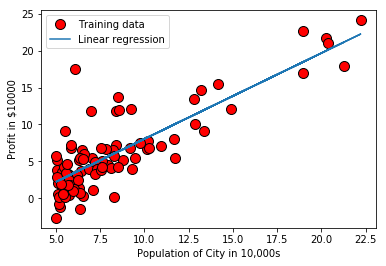

In [73]:
# plot the linear fit
plotData(X[:, 1], y,'Population of City in 10,000s',"Profit in $10000")
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Training data', 'Linear regression']);

Vos valeurs finales pour $ \theta $ seront également utilisées pour faire des prévisions sur les bénéfices dans des zones de 35 000 et 70 000 personnes.

<div class="alert alert-block alert-success">
Notez la façon dont les lignes suivantes utilisent la multiplication matricielle, plutôt que la sommation explicite ou le bouclage, pour calculer les prédictions. Ceci est un exemple de vectorisation de code dans `numpy`.
</div>

<div class="alert alert-block alert-success">
Notez que le premier argument de la fonction `numpy`` dot` est une liste python. `numpy` peut convertir en interne des listes de python ** valides ** en tableaux numpy lorsqu'il est explicitement fourni comme arguments aux fonctions de` numpy`.
</div>


In [74]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



### 2.4 Visualizing $J(\theta)$

Pour mieux comprendre la fonction de coût $ J(\theta) $, vous allez maintenant tracer le coût sur une grille à deux dimensions des valeurs $ \theta_0 $ et $ \theta_1 $. Vous n'aurez pas besoin de coder quoi que ce soit de nouveau pour cette partie, mais vous devez comprendre comment le code que vous avez déjà écrit crée ces images.

Dans la cellule suivante, le code est configuré pour calculer $ J(\theta) $ sur une grille de valeurs à l'aide de la fonction `computeCost` que vous avez écrite. Après avoir exécuté la cellule suivante, vous disposerez d'un tableau 2D de valeurs $ J(\theta) $. Ensuite, ces valeurs sont utilisées pour produire des tracés de surface et de contour de $ J (\theta) $ en utilisant les fonctions matplotlib `plot_surface` et` contourf`. Les tracés doivent ressembler à ceci:
![](Figures/cost_function.png)

The purpose of these graphs is to show you how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global minimum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

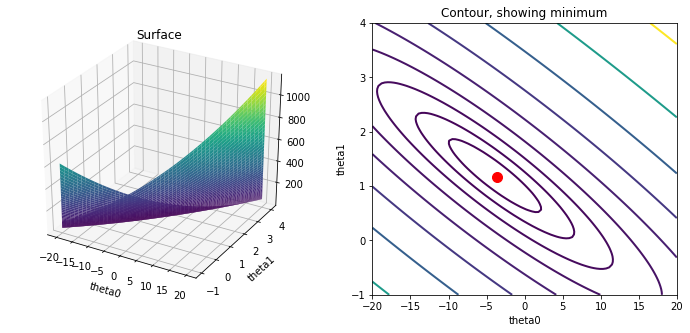

In [75]:
# grid over which we will calculate J
theta0_vals = np.linspace(-20, 20, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))
# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])  
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')
# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')
pass

### Exercice: Choisir 3 points dans le contour et representer les droites qui leur corespondent dans le nuage de points
La figure ci-dessous n'est qu'un exemple de representation de 3 droites à partir de points choisis sur le contour

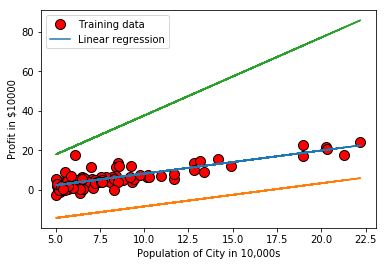

In [76]:
# plot the linear fit
plotData(X[:, 1], y,'Population of City in 10,000s',"Profit in $10000")
#---------Your Code --------------------------
t1=[theta0_vals[41],theta1_vals[43]]
t2=[theta0_vals[0],theta1_vals[43]]
t3=[theta0_vals[45],theta1_vals[98]]
plt.plot(X[:, 1], np.dot(X, t1), '-')
plt.plot(X[:, 1], np.dot(X, t2), '-')
plt.plot(X[:, 1], np.dot(X, t3), '-')
plt.legend(['Training data', 'Linear regression']);
# plt.legend(['Training data', 'Linear regression']);


### Exercice optionnel:
Reprendre les mêmes cellules en changeant de cost function, prenez la moyenne des valeurs absolues des erreurs ( MAE).

L'objectif de la régression linéaire sera de minimiser la fonction de coût

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \lvert h_{\theta}(x^{(i)}) - y^{(i)}\rvert$$

où la fonction d'hypothèse $h_\theta(x)$ est donné par le modèle linéaire
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Rappelez-vous que les paramètres de votre modèle sont les valeurs $ \theta_j $. Ceux-ci sont
les valeurs que vous ajusterez pour minimiser le coût $ J (\ theta) $. Une façon de le faire est de
utiliser l'algorithme de descente de gradient par lots. 
Est-ce que cet algorithme est applicable dans ce cas ci ? Si oui appliquer le et trouver les valeurs de $ \theta_j $ qui minimisent J
Si non expliquer pourquoi ?

Implementer l'algorithme du grid search pour trouver le minimum

In [77]:
def computeCostBis(X, y, theta):
    
    h=np.dot(X,theta)
    # You need to return the following variables correctly
    J = 0.
    # =============================Your Code==============================
    ecart=np.abs(h-y)
    htheta=ecart/(2*m)
    J=np.sum(htheta)
    # ===========================================================
    return J

In [78]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    gradient_descent() performs gradient descent to learn beta by
    taking num_iters gradient steps with learning rate alpha
    """
    J_history = []

    for iteration in range(iterations):
        h = np.dot(X,theta)
        ecart = h-y
        htheta = X.T.dot(ecart)/m
        theta = theta - alpha*htheta
        cost = computeCostBis(X, y, theta)
        J_history.append(cost)


    return theta, J_history



In [79]:
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradient_descent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]



## 3 Regression lineaire avec plusieurs variables

Dans cette partie, vous allez implémenter une régression linéaire avec plusieurs variables pour prédire les prix des maisons. Supposons que vous vendiez votre maison et que vous vouliez savoir ce que serait un bon prix du marché. Une façon de le faire est de recueillir d'abord des informations sur les maisons récemment vendues et de faire un modèle de prix des logements.

Le fichier «Data/ex1data2.txt» contient un ensemble de formation sur les prix des logements à Portland, Oregon. La première colonne est la taille de la maison (en pieds carrés), la deuxième colonne est le nombre de chambres et la troisième colonne est le prix de la maison.

<a id="section4"> </a>
### 3.1 Feature Normalization

Nous commençons par charger et afficher certaines valeurs de cet ensemble de données. En examinant les valeurs, notez que la taille des maisons représente environ 1000 fois la valeur du nombre de chambres. Lorsque les entités diffèrent par ordre de grandeur, la première mise à l'échelle des entités peut faire converger l'algorithme de descente du gradient beaucoup plus rapidement.

In [80]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:,:2]

y = data[:, 2]
m = y.size

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))


  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


Votre tâche ici est de compléter le code dans la fonction `featureNormalize`:
- Soustrayez la valeur moyenne de chaque entité de l'ensemble de données.
- Après avoir soustrait la moyenne, mettre à l'échelle (diviser) en plus les valeurs des caractéristiques par leurs «écarts-types» respectifs.

L'écart type est un moyen de mesurer l'ampleur de la variation de la plage de valeurs d'une caractéristique particulière (la plupart des points de données se situent à ± 2 écarts types de la moyenne); c'est une alternative à la prise de la plage de valeurs (max-min). Dans `numpy`, vous pouvez utiliser la fonction` std` pour calculer l'écart type.

Par exemple, la quantité `X [:, 0]` contient toutes les valeurs de $ x_1 $ (tailles de maison) dans le jeu de formation, donc `np.std (X [:, 0])` calcule l'écart type de la tailles de maison.
Au moment où la fonction `featureNormalize` est appelée, la colonne supplémentaire de 1 correspondant à $ x_0 = 1 $ n'a pas encore été ajoutée à $ X $.

Vous le ferez pour toutes les fonctionnalités et votre code devrait fonctionner avec des ensembles de données de toutes tailles (n'importe quel nombre de fonctionnalités / exemples). Notez que chaque colonne de la matrice $ X $ correspond à une entité.

<div class="alert alert-block alert-warning">
** Remarque sur la mise en œuvre: ** Lors de la normalisation des fonctionnalités, il est important
pour stocker les valeurs utilisées pour la normalisation - la valeur moyenne et l'écart-type utilisé pour les calculs. Après avoir appris les paramètres à partir du modèle, nous voulons souvent prédire les prix des maisons que nous n'avons pas déjà vu. Étant donné une nouvelle valeur x (surface habitable et nombre de chambres), nous devons d'abord normaliser x en utilisant la moyenne et l'écart type que nous avions précédemment calculés à partir de l'ensemble de formation.
</div>
<a id="featureNormalize"></a>

In [81]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy() 
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    n = X_norm.shape[1]
    # =========================== YOUR CODE HERE =====================\
    for i in range(n):
        sigma_var=np.std(X[:,i])
        mu_var=np.mean(X[:,i])
        X_norm[:,i]=(X_norm[:,i]-mu_var)/sigma_var
        sigma[i]=sigma_var
        mu[i]=mu_var
    # ================================================================
    
    return X_norm, mu, sigma

Execute the next cell to run the implemented `featureNormalize` function.

In [82]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)
# Computed mean: [2000.68085106    3.17021277]
# Computed standard deviation: [7.86202619e+02 7.52842809e-01]

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


After the `featureNormalize` function is tested, we now add the intercept term to `X_norm`:

In [84]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


<a id="section5"></a>
### 3.2 Gradient Descent

Auparavant, vous avez implémenté la descente de gradient sur un problème de régression univariée. La seule différence maintenant est qu'il y a une caractéristique de plus dans la matrice 𝑋. La fonction d'hypothèse et la règle de mise à jour de descente de gradient par lots restent inchangées.

Vous devez compléter le code des fonctions computeCostMulti et gradientDescentMulti pour implémenter la fonction de coût et la descente de gradient pour la régression linéaire avec plusieurs variables. Si votre code dans la partie précédente (variable unique) prend déjà en charge plusieurs variables, vous pouvez également l'utiliser ici. Assurez-vous que votre code prend en charge un certain nombre de fonctionnalités et qu'il est bien vectorisé. Vous pouvez utiliser la propriété "shape" des tableaux numpy pour savoir combien d'entités sont présentes dans l'ensemble de données.
<div class="alert alert-block alert-warning">
** Remarque sur la mise en œuvre: ** Dans le cas multivarié, la fonction de coût peut
être également écrit sous la forme vectorisée suivante:
    
$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

où

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

la version vectorisée est efficace lorsque vous travaillez avec des outils informatiques numériques comme `numpy`. Si vous êtes un expert des opérations matricielles, vous pouvez vous prouver que les deux formes sont équivalentes.
</div>

<a id="computeCostMulti"></a>

In [85]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    # ======================= YOUR CODE HERE ===========================
    
    h=np.dot(theta,X.T)
    ecart=h-y
    htheta=(np.dot(ecart,ecart))/(2*m)
    J=np.sum(htheta)
   
    # ==================================================================
    return J


In [86]:
J = computeCostMulti(X, y, theta=np.array([0.0, 0.0,0.0]))
print("Cout pour theta=[0,0,0]: ",J)
# further testing of the cost function
J = computeCostMulti(X, y, theta=np.array([-1, 2,3]))
print("Cout pour theta=[-1,2,3]: ",J)


Cout pour theta=[0,0,0]:  65591548106.45744
Cout pour theta=[-1,2,3]:  65591512874.744576


In [87]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    n = X_norm.shape[1]
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        Tmp=theta.copy()
        h=np.dot(X,Tmp.T)
        ecart=h-y        
        som0=np.sum(ecart)
        theta[0]=Tmp[0]-(alpha/m)*som0
        for i in range(1,n+1):
            f=np.dot(ecart,X[:,i])
            som=np.sum(f)
            theta[i]=Tmp[i]-(alpha/m)*som
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

In [88]:
theta = np.zeros(3)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescentMulti(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: 340412.5630, 109370.0567


#### 3.2.1 Exercise: Selection de taux d'apprentissage

Dans cette partie de l'exercice, vous pourrez essayer différents taux d'apprentissage pour l'ensemble de données et trouver un taux d'apprentissage qui converge rapidement. Vous pouvez modifier le taux d'apprentissage en modifiant le code suivant et en modifiant la partie du code qui définit le taux d'apprentissage.

Utilisez votre implémentation de la fonction `gradientDescentMulti` et exécutez la descente de gradient pendant environ 50 itérations au rythme d'apprentissage choisi. La fonction doit également renvoyer l'historique des valeurs $ J (\ theta) $ dans un vecteur $ J $.

Après la dernière itération, tracez les valeurs J par rapport au nombre d'itérations.

Si vous avez choisi un taux d'apprentissage dans une bonne fourchette, votre graphique ressemble à la figure suivante.

![](Figures/learning_rate.png)

Si votre graphique semble très différent, surtout si votre valeur de $ J (\theta) $ augmente ou explose, ajustez votre taux d'apprentissage et réessayez. Nous vous recommandons d'essayer les valeurs du taux d'apprentissage $ \alpha $ sur une échelle logarithmique, à des étapes multiplicatives d'environ 3 fois la valeur précédente (c'est-à-dire 0,3, 0,1, 0,03, 0,01, etc.). Vous pouvez également ajuster le nombre d'itérations que vous exécutez si cela vous aide à voir la tendance globale de la courbe.

<div class="alert alert-block alert-warning">
** Remarque sur la mise en œuvre: ** Si votre taux d'apprentissage est trop élevé, $ J (\theta) $ peut diverger et "exploser", ce qui entraîne des valeurs trop grandes pour les calculs informatiques. Dans ces situations, `numpy` aura tendance à revenir
NaNs. NaN signifie «pas un nombre» et est souvent causé par des opérations non définies qui impliquent −∞ et + ∞.
</div>

<div class="alert alert-block alert-warning">
** Astuce MATPLOTLIB: ** Pour comparer comment différents taux d'apprentissage d'apprentissage affectent la convergence, il est utile de tracer $ J $ pour plusieurs taux d'apprentissage sur la même figure. Cela peut être fait en faisant de `alpha` une liste python, en bouclant sur les valeurs de cette liste et en appelant la fonction plot à chaque itération de la boucle. Il est également utile d'avoir une légende pour distinguer les différentes lignes dans l'intrigue. Recherchez en ligne «pyplot.legend» pour obtenir de l'aide sur l'affichage des légendes dans «matplotlib».
</div>

Notez les changements dans les courbes de convergence à mesure que le taux d'apprentissage change. Avec un faible taux d'apprentissage, vous devriez constater que la descente de gradient met du temps à converger vers la valeur optimale. Inversement, avec un taux d'apprentissage élevé, la descente de gradient peut ne pas converger ou même diverger!
En utilisant le meilleur taux d'apprentissage que vous avez trouvé, exécutez le script
pour exécuter la descente du gradient jusqu'à la convergence pour trouver les valeurs finales de $ \theta $. Prochain,
utiliser cette valeur de $ \theta $ pour prédire le prix d'une maison de 1650 pieds carrés et
3 chambres. Vous utiliserez la valeur plus tard pour vérifier votre implémentation des équations normales. N'oubliez pas de normaliser vos fonctionnalités lorsque vous faites cette prédiction!

"""
Instructions
------------
We have provided you with the following starter code that runs
gradient descent with a particular learning rate (alpha). 

Your task is to first make sure that your functions - `computeCost`
and `gradientDescent` already work with  this starter code and
support multiple variables.

After that, try running gradient descent with different values of
alpha and see which one gives you the best result.

Finally, you should complete the code at the end to predict the price
of a 1650 sq-ft, 3 br house.

Hint
----
At prediction, make sure you do the same feature normalization.
"""
# Choose some alpha value - change this
alpha = 0.1
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================

# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

price = np.dot(np.array([1.,(1650. - mu[0])/sigma[0] , (3. - mu[1])/sigma[1]]),np.array(theta) )  # You should change this
print(price)
# ===================================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed with from gradient descent: [340412.65957447 109447.79646964  -6578.35485416]
theta computed with from gradient descent: [340412.65957447 109447.79646964  -6578.35485416]
theta computed with from gradient descent: [340412.65894002 109439.22578243  -6569.78416695]
theta computed with from gradient descent: [340412.65957447 109447.79646948  -6578.35485399]
theta computed with from gradient descent: [294388.89339564  83125.36792731  15212.40521995]
theta computed with from gradient descent: [339576.43615572 105311.60418477  -2450.82887525]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293081


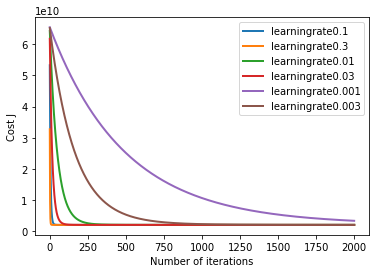

In [89]:
# Choose some alpha value - change this
alpha = [0.1, 0.3,0.01,0.03, 0.001,0.003]
num_iters = 2000

# init theta and run gradient descent
for i in range(len(alpha)):
    theta = np.zeros(3)
    theta, J_history = gradientDescentMulti(X, y, theta, alpha[i], num_iters)

    # Plot the convergence graph
    plt.plot(np.arange(len(J_history)), J_history, lw=2,label = 'learningrate'+str(alpha[i]))
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.legend()
    print('theta computed with from gradient descent: {:s}'.format(str(theta)))
# Display the gradient descent's result
theta, J_history = gradientDescentMulti(X, y, theta, 0.03, num_iters)


# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
price = np.dot(np.array([1.,(1650. - mu[0])/sigma[0] , (3. - mu[1])/sigma[1]]),np.array(theta) )
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

  # You should change this

# ===================================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

#### 3.2.2 Exercise: Ecrivez une methode qui permet de predire le prix d'une maison en fonction de la superfice et du nombre de piece

In [90]:
def predict(superficie, pieces, mu, sigma,theta):
    price = np.dot(np.array([1.,(superficie - mu[0])/sigma[0] , (pieces - mu[1])/sigma[1]]),np.array(theta) )
    return price
price = predict(1650,3,mu,sigma,theta)
print(price)

293081.4643348978


<a id="section7"></a>
### 3.3 Normal Equations

Dans les vidéos de conférence, vous avez appris que la solution de forme fermée à la régression linéaire est

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

L'utilisation de cette formule ne nécessite aucune mise à l'échelle des fonctionnalités et vous obtiendrez une solution exacte en un seul calcul: il n'y a pas de «boucle jusqu'à la convergence» comme dans la descente de gradient.

Tout d'abord, nous rechargerons les données pour nous assurer que les variables n'ont pas été modifiées. N'oubliez pas que même si vous n'avez pas besoin de mettre à l'échelle vos fonctionnalités, nous devons toujours ajouter une colonne de 1 à la matrice $ X $ pour avoir un terme d'interception ($ \theta_0 $). Le code dans la cellule suivante ajoutera la colonne de 1 à X pour vous.

In [91]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Complétez le code de la fonction normalEqn ci-dessous pour utiliser la formule ci-dessus pour calculer 𝜃.

<a id="normalEqn"></a>

In [92]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================
    inverse=np.linalg.inv(np.dot(X.T,X))
    k=np.dot(X.T,y)
    theta=np.dot(inverse,k)
    # =================================================================
    return theta


#### 3.2.3 Exercise: Ecrivez une methode qui permet de predire le prix d'une maison en fonction de la superfice et du nombre de piece
    utilisant l'équation normale

In [93]:
def predictnorm(superficie, pieces,theta):
    return np.dot([1,superficie,pieces],theta)

Maintenant, une fois que vous avez trouvé 𝜃 en utilisant cette méthode, utilisez-le pour faire une prévision de prix pour une maison de 1650 pieds carrés avec 3 chambres. Vous devriez trouver qui donne le même prix prévu que la valeur que vous avez obtenue en utilisant le modèle ajusté avec descente de gradient (dans la section 3.2.1).

In [94]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================

price = predictnorm(1650,3,theta) # You should change this

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))

Theta computed from the normal equations: [89597.9095428    139.21067402 -8738.01911233]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $293081


### 4 Exercise: Trouvez des données et faites de la prévision en utilisant les algorithmes implementées dans ce notebook. 

In [100]:
data=np.genfromtxt('Data/Salaire_employes.csv',delimiter=',',skip_header=1)
X = data[:,0]
y = data[:,1]
m=X.size


In [101]:
X = np.stack([np.ones(m), X], axis=1)

In [102]:
theta = np.zeros(2)

# some gradient descent settings
iterations = 1600
alpha = 0.03

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: 25791.3002, 9450.0959


In [103]:
predict1 = np.dot([1., 10.3], theta)

In [104]:
print("pour 10.3 annees d'experience nous predisons une salaire de ${:.0f}".format(predict1))

pour 10.3 annees d'experience nous predisons une salaire de $123127


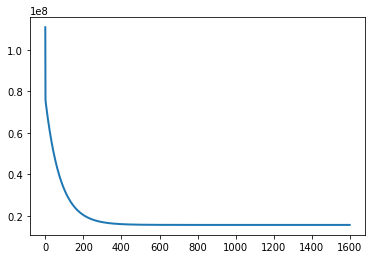

In [105]:
plt.plot(np.arange(len(J_history)), J_history, lw=2)

In [106]:
theta = normalEqn(X, y)
print(theta)

[25792.20019867  9449.96232146]


In [107]:
prediction=np.dot([1.,10.3],theta)
print("pour 10.3 annees d'experience nous predisons une salaire de ${:.0f}".format(prediction))

pour 10.3 annees d'experience nous predisons une salaire de $123127


In [108]:
import pandas as pd
data=pd.read_csv("Data/50_Startups.csv")
data['State'].replace(['New York','Florida','California'],[0,1,2],inplace=True)
dataset=data[['R&D Spend','Administration','Marketing Spend','State','Profit']].values

X=dataset[:,:4]
y=dataset[:, 4]
m=y.size


In [109]:
X_norm, mu, sigma = featureNormalize(X)

In [110]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [111]:
theta = np.zeros(5)
# some gradient descent settings
iterations =2400
alpha = 0.03

theta, J_history = gradientDescentMulti(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}, {:.4f}, {:.4f},{:.4f}'.format(*theta))


Theta found by gradient descent: 112012.6392, 36614.4560, -744.0470, 3296.2165,18.4060


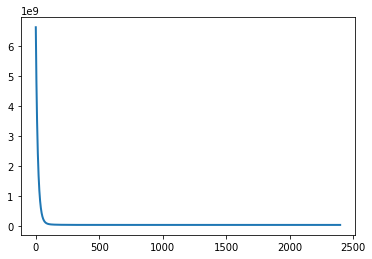

In [112]:
plt.plot(np.arange(len(J_history)), J_history, lw=2)

In [113]:
profit = np.dot(np.array([1.,(165349.2 - mu[0])/sigma[0] , (136897.8 - mu[1])/sigma[1],(471784.1 - mu[2])/sigma[2],(0 - mu[3])/sigma[3]]),np.array(theta) )

In [114]:
print("Le profit predit est de ${:.2f}".format(profit))

Le profit predit est de $192502.76


In [115]:
X=dataset[:,:4]
y=dataset[:, 4]
m=y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [116]:
theta = normalEqn(X, y)

In [117]:
price = np.dot([1.,165349.2,136897.8,471784.1,0],theta)
print("Le profit predit est de ${:.2f}".format(price))

Le profit predit est de $192502.76
